In [1]:
%matplotlib inline
import pandas as pd
import requests
import numpy as np

import roc_results

In [2]:
response = requests.get('http://localhost:8000/result/')
rec = []
for r in response.json():
    svm = r.get('algorithm').get('svm')
    if svm.get('kernel') == 'rbf':
        rec.append({
            'kernel': svm.get('kernel'),
            'c': svm.get('c'),
            'gamma': svm.get('gamma'),
            'roc_auc_score': r.get('roc_auc_score'),
            'stock': r.get('stock')
        })
df = pd.DataFrame(rec)

In [3]:
log_res = []
for i, row in df.iterrows():
    log_res.append(roc_results.results.get(row['stock']))
df['log_res'] = log_res
df['diff'] = df['roc_auc_score'] - log_res

In [4]:
print(len(df['stock'].unique()))
print(len(df[df['log_res'] <= df['roc_auc_score']]['stock'].unique()))

6
4


In [5]:
df[df['log_res'] <= df['roc_auc_score']]

,c,gamma,kernel,roc_auc_score,stock,log_res,diff
50,1.0,1.0000,rbf,0.570711,2645,0.550357,0.020354
51,1.0,10.0000,rbf,0.570256,2645,0.550357,0.019899
52,1.0,100.0000,rbf,0.561553,2645,0.550357,0.011196
53,1.0,1000.0000,rbf,0.556933,2645,0.550357,0.006576
55,10.0,0.0010,rbf,0.570277,2645,0.550357,0.019920
56,10.0,1.0000,rbf,0.569473,2645,0.550357,0.019116
57,10.0,10.0000,rbf,0.570215,2645,0.550357,0.019858
58,10.0,100.0000,rbf,0.558708,2645,0.550357,0.008351
60,100.0,0.0001,rbf,0.570277,2645,0.550357,0.019920
61,100.0,0.0010,rbf,0.569305,2645,0.550357,0.018948


In [6]:
df.groupby('stock').aggregate({'roc_auc_score': np.max})

,roc_auc_score
stock,
11399,0.585014
1472,0.564787
2645,0.572695
9063,0.547252
9069,0.548780
9926,0.597868


In [7]:
df_bests = df.loc[df.groupby('stock')['roc_auc_score'].idxmax()]
# I would like to have all of them

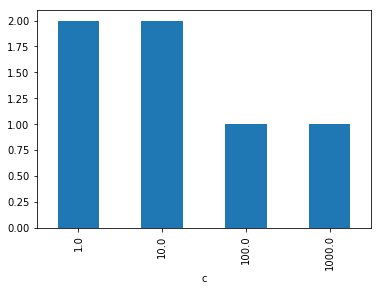

In [8]:
df_bests.groupby('c')['c'].count().plot(kind='bar')

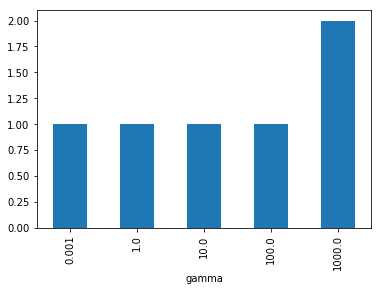

In [9]:
df_bests.groupby('gamma')['gamma'].count().plot(kind='bar')

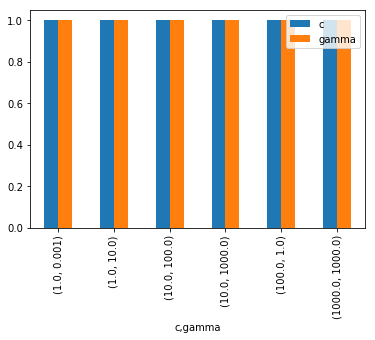

In [10]:
df_bests.groupby(['c', 'gamma'])[['c','gamma']].count().plot(kind='bar')

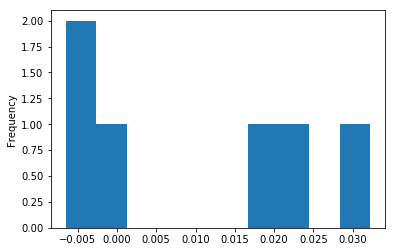

In [11]:
df_bests['diff'].plot(kind='hist')